In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#https://www.projectpro.io/recipes/do-affinity-based-clustering-in-python 

path='/content/drive/MyDrive/Test-Time training with MA/datasets/n01440764'
X=plt.imread(path+'/ILSVRC2012_val_00000293.JPEG')
#wine = datasets.load_wine()
#X = wine.data; 
data = pd.DataFrame(X)
cor = data.corr()

fig = plt.figure(figsize=(10,10))
sns.heatmap(cor, square = True)
plt.show()

ValueError: ignored

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
clt = AffinityPropagation(damping=0.5, max_iter=500, affinity="euclidean")

In [ ]:
model = clt.fit(X_std)
n_clusters_ = len(model.cluster_centers_indices_)
print("Number of Clusters: ",n_clusters_)

Number of Clusters:  14


In [ ]:
clusters = pd.DataFrame(model.fit_predict(X_std))
data["Cluster"] = clusters

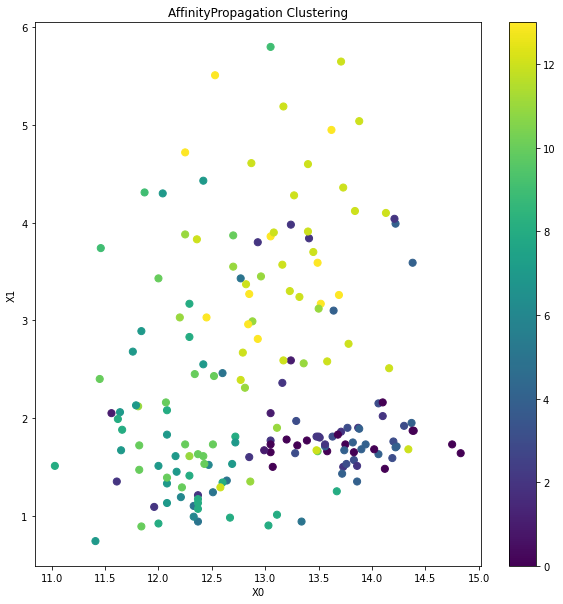

In [ ]:
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(data[0],data[1], c=data["Cluster"],s=50)
ax.set_title("AffinityPropagation Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

Other version

In [1]:

# Number of images in the dataset
n_images = 100

# Initialize the affinity matrix with zeros
affinity_matrix = np.zeros((n_images, n_images))

# Loop over all pairs of images
for i in range(n_images):
  for j in range(i+1, n_images):
    # Use the trained model to predict the class of each image
    pred_i = model.predict(x_i)
    pred_j = model.predict(x_j)
    # If the model predicts the same class for both images,
    # then they are considered similar
    if pred_i == pred_j:
      similarity = 1.0
    else:
      similarity = 0.0
    # Update the affinity matrix with the similarity value
    affinity_matrix[i, j] = similarity
    affinity_matrix[j, i] = similarity


NameError: ignored

In [ ]:
# Use the Affinity Propagation algorithm to cluster the images
clustering = AffinityPropagation(affinity='precomputed').fit(affinity_matrix)

# Get the labels for each image
labels = clustering.labels_

# Print the number of clusters
n_clusters = len(set(labels))
print(f'Number of clusters: {n_clusters}')

# Print the images that belong to each cluster
for i in range(n_clusters):
  cluster_images = [x_i for j, x_i in enumerate(x) if labels[j] == i]
  print(f'Cluster {i}: {cluster_images}')
